In [1]:
%%html
<!-- Potrzebne dla poprawnego wyświetlania tqdm w VSCode https://stackoverflow.com/a/77566731 -->
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}
</style>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch

torch.backends.cudnn.benchmark = True


In [3]:
def get_device():
  return torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = get_device()
device

device(type='cuda')

## Wczytywanie zbioru danych

In [82]:
import torch

from torchvision.transforms import InterpolationMode
import torchvision.transforms.v2 as v2

from A2D2Dataset import A2D2Dataset
from torchvision.datasets import Cityscapes

# transformacje
transforms = v2.Compose([
    v2.RandomResizedCrop((768, 768), scale=(0.5, 2.0), interpolation=InterpolationMode.NEAREST),
    v2.RandomHorizontalFlip(0.5),
    v2.PILToTensor(),
    v2.ConvertImageDtype(torch.float32),
    v2.ColorJitter(0.2, 0.2, 0.2, 0.1),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# A2D2

# a2d2_root = ".\\data\\a2d2\\"

# train_dataset = A2D2Dataset(
#     root=a2d2_root,
#     split='train',
#     transforms=transforms
    
# )

# test_dataset = A2D2Dataset(
#     root=a2d2_root,
#     split='val',
#     transforms=transforms
# )

# Cityscapes

cityscapes_root = ".\\data\\cityscapes"

train_dataset = Cityscapes(
    root=cityscapes_root,
    split='train',
    target_type="semantic",
    transforms=transforms
)

test_dataset = Cityscapes(
    root=cityscapes_root,
    split='val',
    target_type="semantic",
    transforms=transforms
)

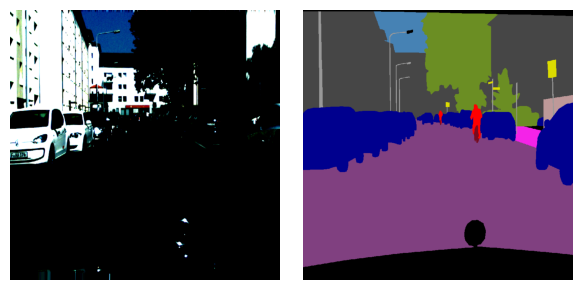

In [86]:
from A2D2Dataset import A2D2Dataset
from torchvision.datasets import cityscapes
import matplotlib.pyplot as plt
import numpy as np

image, label = test_dataset[1]

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

img_np = np.clip(image.permute(1,2,0).numpy(), 0, 1)
img_np = np.clip(img_np, 0, 1)

mask_np = label.squeeze(0).numpy()

palette = {
    cls.id: cls.color
    for cls in test_dataset.classes
    if getattr(cls, "train_id", 0) != 255
}

mask_rgb = np.zeros((*mask_np.shape, 3), dtype=np.uint8)
for cid, rgb in palette.items():
    mask_rgb[mask_np == cid] = rgb

plt.subplot(1, 2, 1); plt.imshow(img_np);   plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(mask_rgb); plt.axis('off')
plt.tight_layout(); plt.show()

Loading checkpoint 'resnet50_cityscapes___no_weights_with_warmup'
Resuming from epoch 2


  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 3/60] Train Loss: 1.4949


  0%|          | 0/125 [00:00<?, ?it/s]

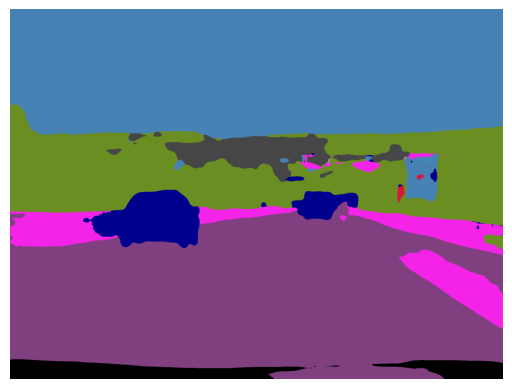

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 4/60] Train Loss: 1.0835


  0%|          | 0/125 [00:00<?, ?it/s]

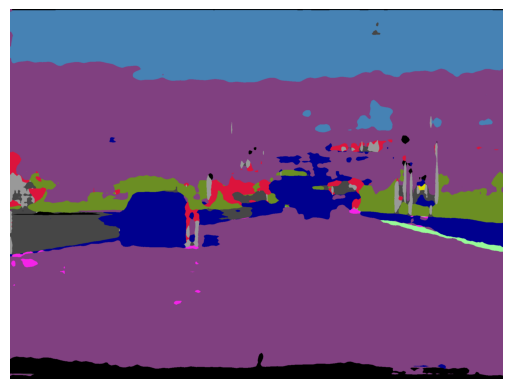

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 5/60] Train Loss: 0.8351


  0%|          | 0/125 [00:00<?, ?it/s]

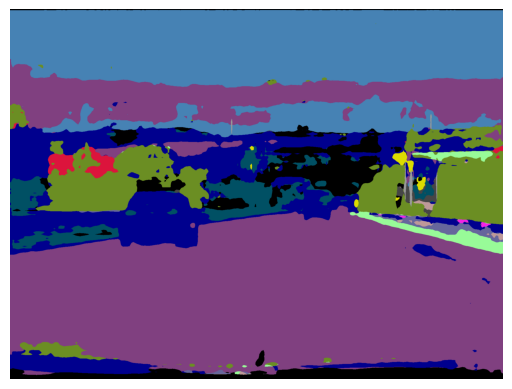

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 6/60] Train Loss: 0.7389


  0%|          | 0/125 [00:00<?, ?it/s]

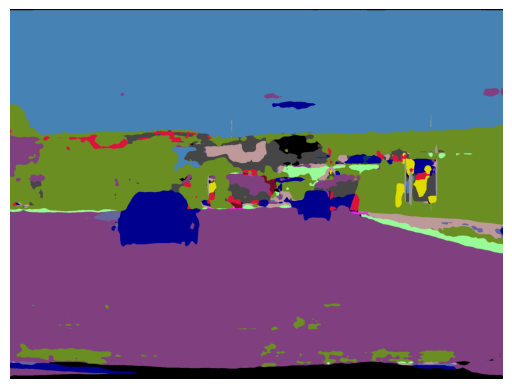

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 7/60] Train Loss: 0.6964


  0%|          | 0/125 [00:00<?, ?it/s]

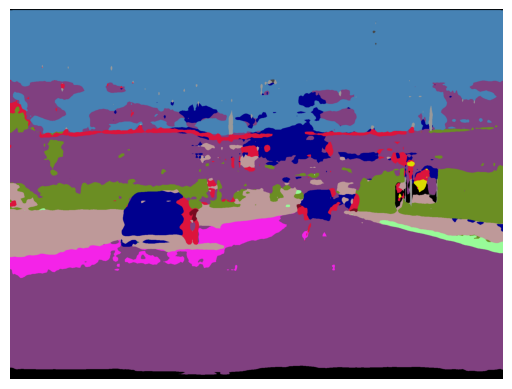

c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 8/60] Train Loss: 0.5866


  0%|          | 0/125 [00:00<?, ?it/s]

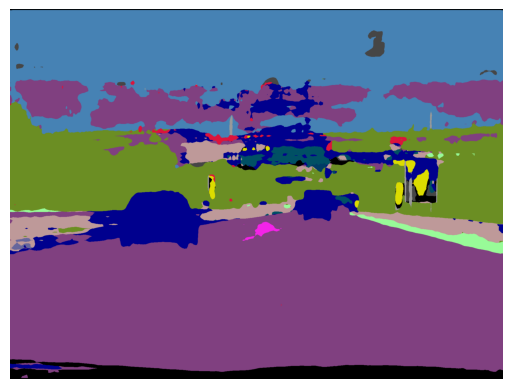

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 9/60] Train Loss: 0.5530


  0%|          | 0/125 [00:00<?, ?it/s]

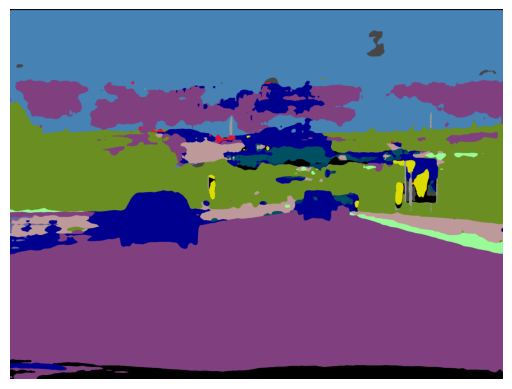

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 10/60] Train Loss: 0.5353


  0%|          | 0/125 [00:00<?, ?it/s]

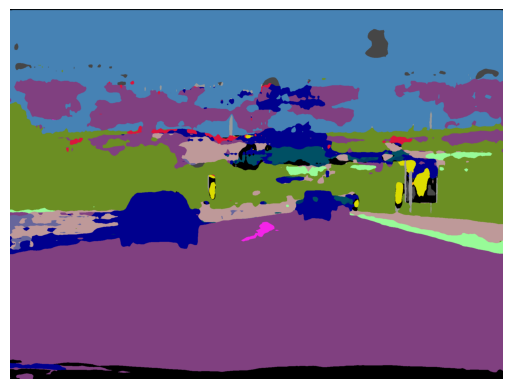

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 11/60] Train Loss: 0.5229


  0%|          | 0/125 [00:00<?, ?it/s]

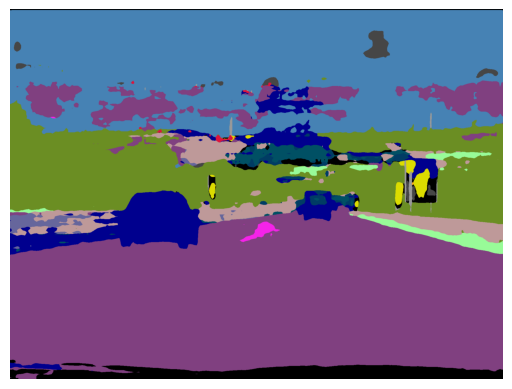

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 12/60] Train Loss: 0.5177


  0%|          | 0/125 [00:00<?, ?it/s]

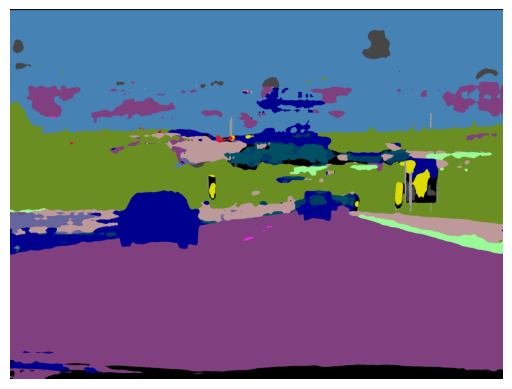

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 13/60] Train Loss: 0.5098


  0%|          | 0/125 [00:00<?, ?it/s]

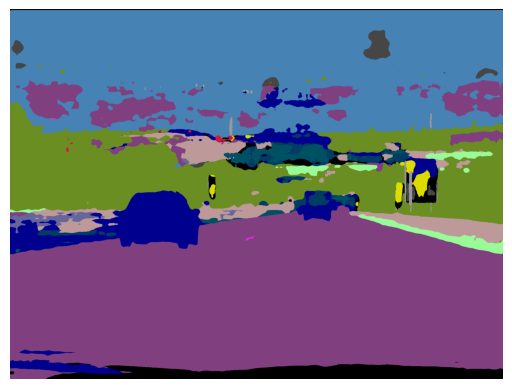

  0%|          | 0/743 [00:00<?, ?it/s]

[Epoch 14/60] Train Loss: 0.5008


  0%|          | 0/125 [00:00<?, ?it/s]

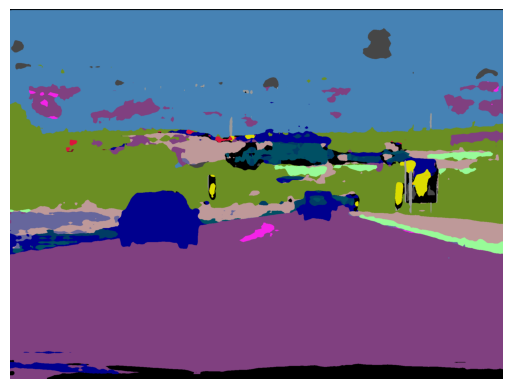

  0%|          | 0/743 [00:00<?, ?it/s]

In [ ]:
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights

from train import train_model

weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights, aux_loss=True)

train_model(
    model=model,
    num_epochs=60,
    warmup_epochs=5,
    lr=5e-5,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    ckpt_name="resnet50_cityscapes___no_weights_with_warmup",
    device=device
)

## Generowanie przykładowych obrazów
Po wytrenowaniu modelu należy wprowadzić poniżej nazwę checkpointu oraz ścieżkę do pliku `.png`, na  którym można przetestować działanie modelu.

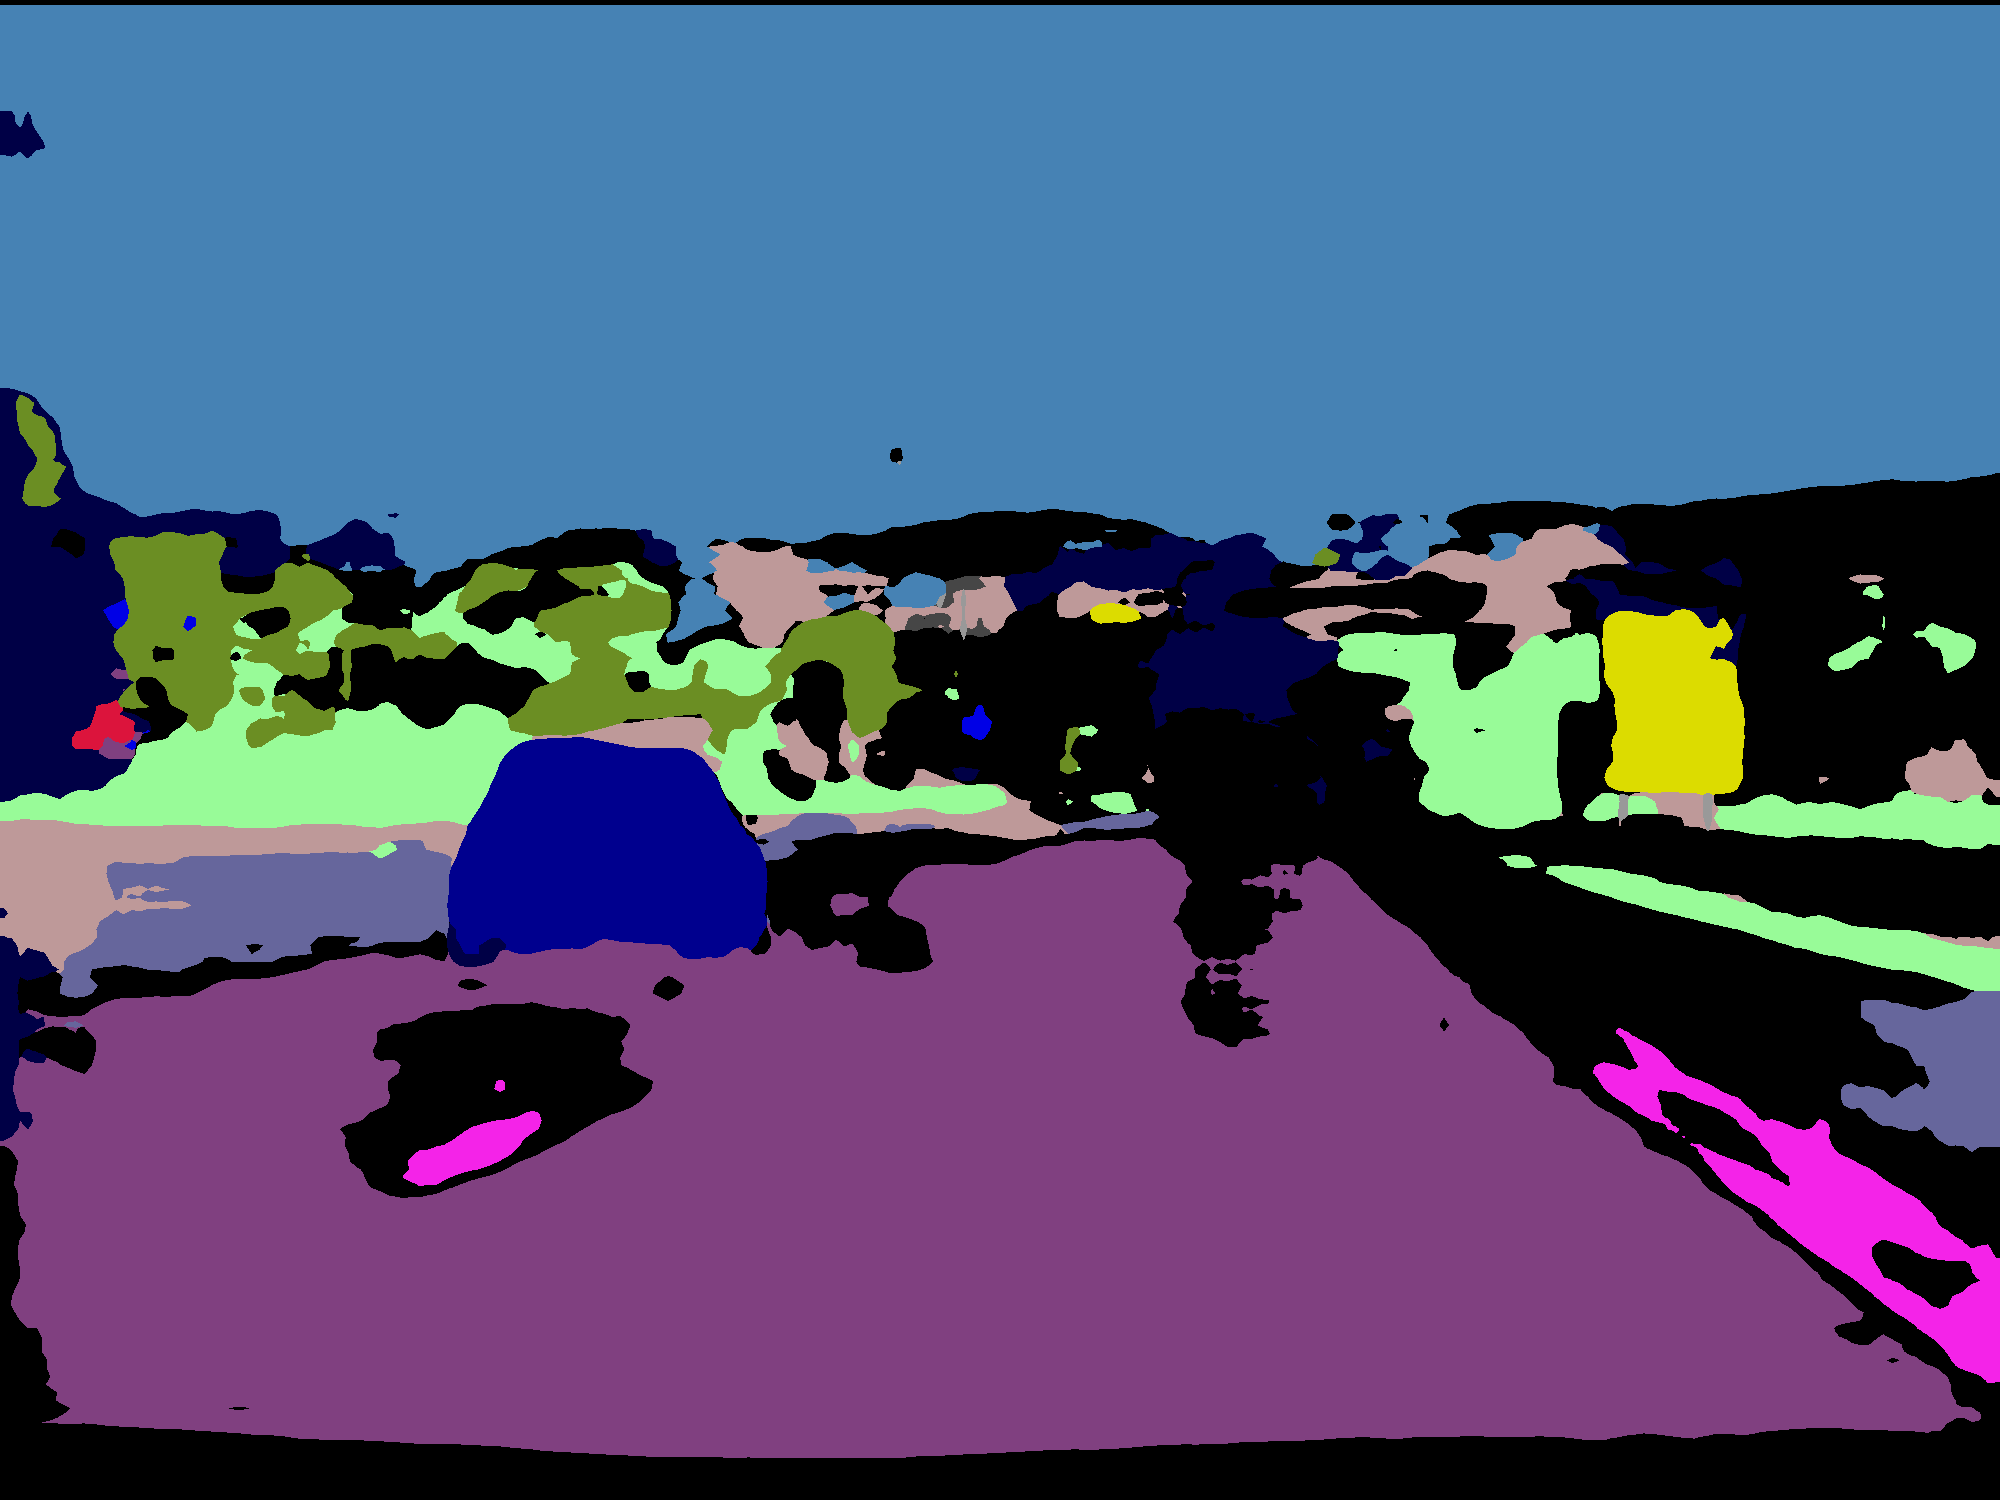

In [ ]:
from mask_generation import generate_segmentation_mask_file

generate_segmentation_mask_file(
    device=device,
    checkpoint_path=".\\model\\resnet50_cityscapes_6_ep_15.ckpt",
    input_img_path=".\\test\\test2.png",
    classes=Cityscapes.classes
)